In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("billets.csv")
data = pd.DataFrame(data, columns=data.columns)

data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


# Mission 0

In [3]:
data.shape

(170, 7)

## Nettoyage

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
is_genuine      170 non-null bool
diagonal        170 non-null float64
height_left     170 non-null float64
height_right    170 non-null float64
margin_low      170 non-null float64
margin_up       170 non-null float64
length          170 non-null float64
dtypes: bool(1), float64(6)
memory usage: 8.2 KB


<p> Des valeurs sont manquantes / Non attribuées

In [5]:
print("Les colonnes qui sont NaN :")
i = 0
while i <= 6:
    print(data.columns[i],":", any(pd.isna(data.iloc[:,i])))
    i += 1

Les colonnes qui sont NaN :
is_genuine : False
diagonal : False
height_left : False
height_right : False
margin_low : False
margin_up : False
length : False


## Analyses univariées

### Describe sur tout le Df

In [6]:
data_all = data.describe()
data_all

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


<p> On remarque que sur toutes les valeurs, seule "margin_low" et "length" possède un écart type important ; Cela nous indique que les valeurs varient fortement (plus fortement que les autres variables)</p>
<p> Voyons maintenant par type de billet - Vrai et Faux - comment se comporte les variables.</p>

### Describe sur les faux billets

In [7]:
faux = data[data.is_genuine == False].describe()
faux

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


<p> Encore une fois les valeurs "margin_low" et "length" se démarquent dans leur écart type </p>
<p> Voyons si ces écarts types sont sont les mêmes avec les vrais billets </p>

### Describe sur les vrais billets

In [8]:
vrais = data[data.is_genuine == True].describe()
vrais

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


<p> Les minimums et maximums des valeurs True et False correspondent bien, nous ne pouvons rien déduire directement <br/>
(Si le maximum d'un True est inférieur au minimum d'un False alors nous cela aurait pu nous aider) </p>

<p> Cependant on remarque que cette fois, les écarts types des variables "margin_low" et "length" ne sont pas très éloignés des autres variables. Il semblerait donc que les faux billets se démarquent par une forte variances en margin_low et length </p>

<p> Il ne semble pas y avoir de valeur aberrantes de première abord ; Voyons avec des graphiques. </p>

C:\Users\jpaul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


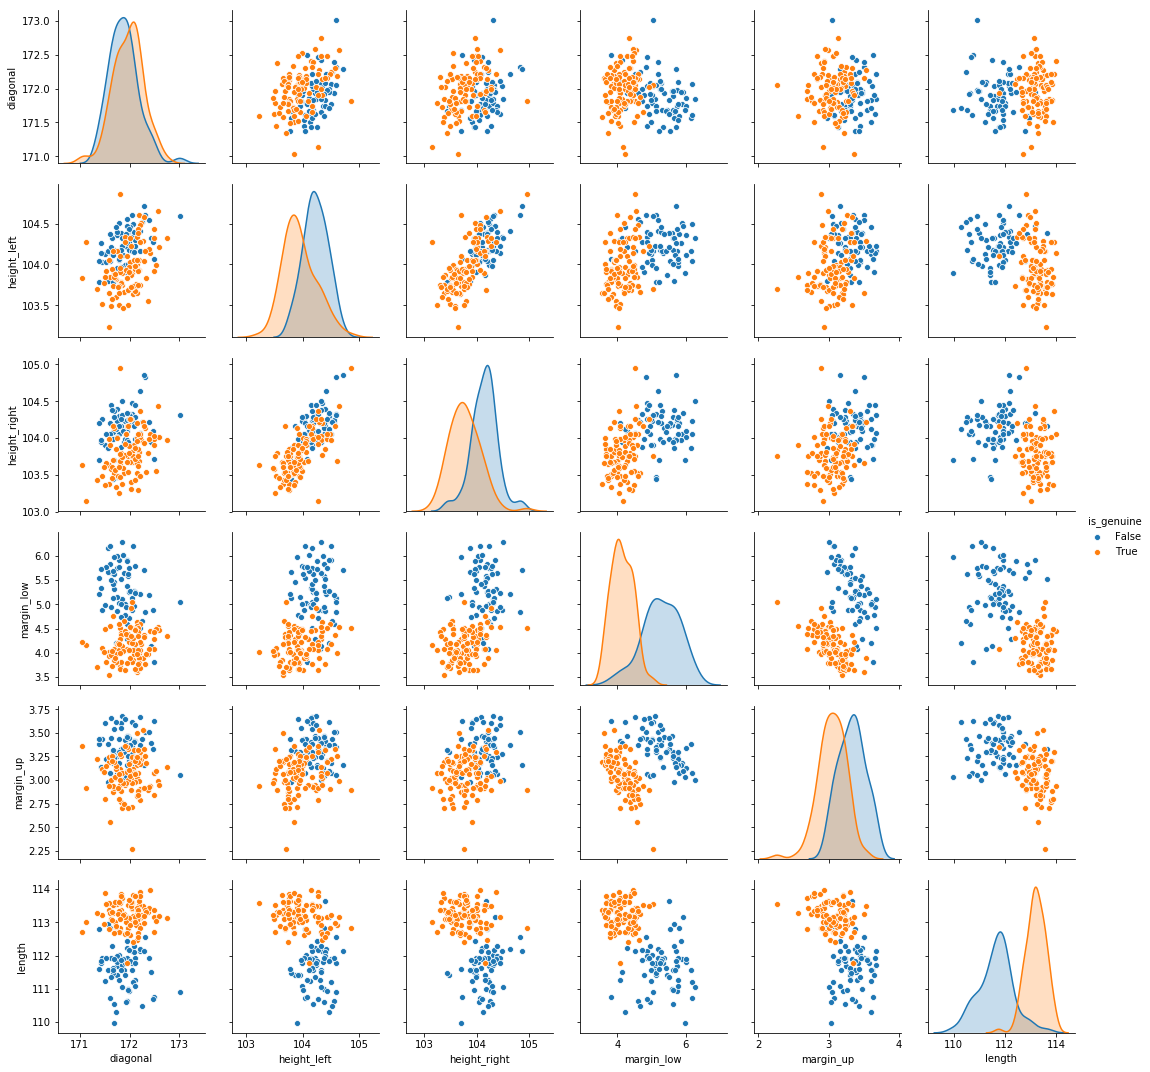

In [9]:
sns.pairplot(data, hue="is_genuine", vars=data.iloc[:,1:])
plt.savefig("Graphiques/analyses_bivariees.png")
plt.show()

<p> Les colonnes Margin_low et Length se démarquent par leurs grandes différences entre les vrais et faux billets. <br/> Un billet ayant une valeur de 110mm en length est nécessairement faux, ce qui n'est pas le cas pour diagonal par exemple</p>
<p> Si l'on décidait de se baser uniquement sur ces histogrammes pour détecter si un billet est vrai ou non, alors le programme ne serait pas satisfaisant ; <br/>
    En effet on peut voir que certains faux billets ont la même taille (en margin_low ou length) que les vrais billets, et inversement. Nous passerions donc à côté de faux billets. </p>

### Distribution Margin_low/up et Length

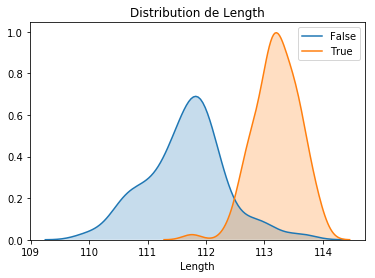

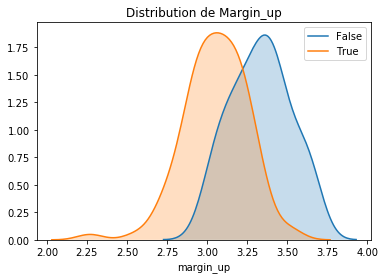

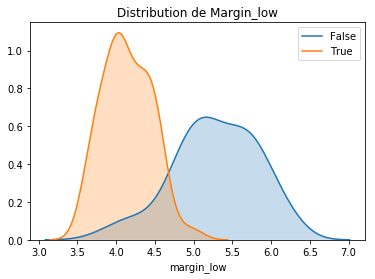

In [10]:
sns.kdeplot(data[data['is_genuine'] == False]['length'],shade=True, label='False')
sns.kdeplot(data[data['is_genuine'] == True]['length'], shade=True, label='True')
plt.title('Distribution de Length')
plt.xlabel('Length')
plt.legend()
plt.savefig("Graphiques/distrib_length.png")
plt.show()

sns.kdeplot(data[data['is_genuine'] == False]['margin_up'],shade=True, label='False')
sns.kdeplot(data[data['is_genuine'] == True]['margin_up'], shade=True, label='True')
plt.title('Distribution de Margin_up')
plt.xlabel('margin_up')
plt.legend()
plt.savefig("Graphiques/distrib_margin_up.png")
plt.show()

sns.kdeplot(data[data['is_genuine'] == False]['margin_low'],shade=True, label='False')
sns.kdeplot(data[data['is_genuine'] == True]['margin_low'], shade=True, label='True')
plt.title('Distribution de Margin_low')
plt.xlabel('margin_low')
plt.legend()
plt.savefig("Graphiques/distrib_margin_low.png")
plt.show()

<p> On voit qu'il y a des extrêmes pour ces valeurs, voyons maintenant si les extrêmes de l'une des valeurs correspondent aux extrêmes de l'autre. </p>

### les outliers

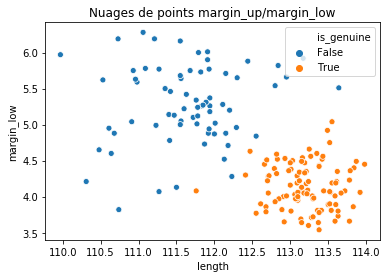

In [11]:
sns.scatterplot(data['length'], data['margin_low'], hue=data['is_genuine'])
plt.title('Nuages de points margin_up/margin_low')
plt.xlabel('length')
plt.ylabel("margin_low")
plt.legend()
plt.savefig("Graphiques/nuage_points_length_margin_low.png")
plt.show()

<p> On remarque ici deux clusters distinct. D'un côté les vrais billets regroupés pour uen grande valeur length et une petite valeur margin_low. De l'autre les faux billets avec une valeur plus faible pour length et une grande valeur pour margin_low </p>

### Relations linéaires

<p> Nous pouvons remarquer des relations linéaires dans le pairplot entre margin_low et margin_up, voyons cela plus en détails

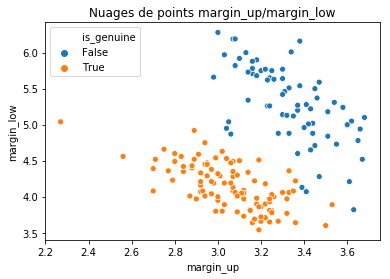

In [12]:
sns.scatterplot(data['margin_up'], data['margin_low'], hue=data['is_genuine'])
plt.title('Nuages de points margin_up/margin_low')
plt.xlabel('margin_up')
plt.ylabel("margin_low")
plt.legend()
plt.savefig("Graphiques/nuage_points_margin_up_low.png")
plt.show()

<p> On a bien ici deux relations linéaires, pour les vrais et faux billets </p>

# Partie 1 : ACP

In [13]:
from functions2 import *
from sklearn import preprocessing, decomposition

## Composantes principales

In [14]:
n_comp = 5

data_pca = data[["diagonal", "height_left", 
                 "height_right", "margin_low", 
                 "margin_up", "length"]]

data_pca = data_pca.fillna(data_pca.mean())

#On ne prend que les valeurs
X = data_pca.values

#La variable qui nous permettra de colorer nos résultats : 
fakeornot = [data.loc[fake, "is_genuine"] for fake in data.index]

names = data_pca.index

features = data_pca.columns

#Centrage et réduction : 
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Calcul des composantes principales : 
pca = decomposition.PCA(n_components = n_comp)
pca = pca.fit(X_scaled)

## Eboulis des valeurs propres

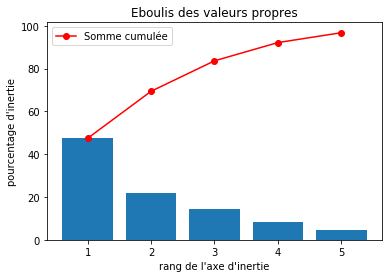

In [15]:
display_scree_plot(pca)

<p> L'éboulie des valeurs propres nous indique que 5 composantes principales sont nécessaires pour expliquer presque 100% des données. </p>

<p> Nous apprenons aussi que la composante principale 1 (PC1) explique 47,4 % des informations.</p>

<p>Notons aussi qu'un plan factoriel (F) correspond à la projection d'une composante principale (PC) sur un axe. <br/>
F1 correspond donc à la projection de PC1, F2 à la projection de PC2, ect...</p>

## Cercle des corrélations

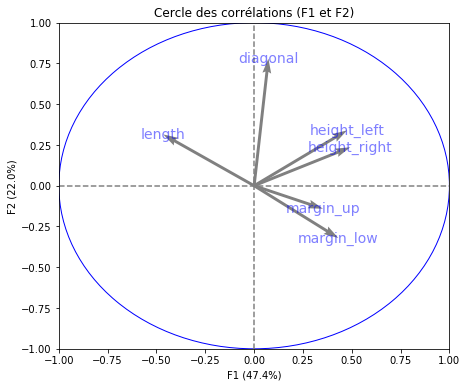

In [16]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

<p> Le cercle des corrélations indique que height_left, height_right, margin_up, margin_low, et length sont corrélées pour F1. </p>

<p> Afin de vérifier cela par les chiffres, regardons le poids de chaque variable sur l'inertie de l'axe :</p>

## Poids des variables 

In [17]:
poids_des_variables = pd.DataFrame(pcs, index=[["F1", "F2", "F3", "F4", "F5"]], 
                                   columns = features)

pds = poids_des_variables

#On transpose la matrice (utile pour plus tard dans le programme)
pds = pds.T
#On ne prend que F1 et F2 (qui nous intéressent)
pds = pds.iloc[:,:2]
pds

,F1,F2
diagonal,0.073275,0.779639
height_left,0.475502,0.339250
height_right,0.491821,0.235543
margin_low,0.431027,-0.320537
margin_up,0.352540,-0.141120
length,-0.465373,0.314536


<p> On retrouve bien ici nos colonnes vues précédemment pour F1. </p>

## Projection des individus

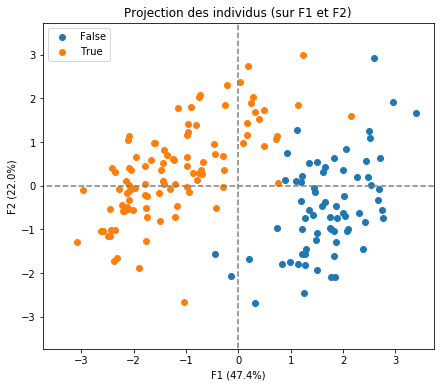

In [18]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)]
                         , illustrative_var = fakeornot,
                        name="Graphiques/Projection_acp.png")

<p> La projection des individus sur F1 et F2 nous indique deux clusters, les vrais billets, ainsi que les faux. Il semble donc que nous allons pouvoir nous servir de F1 et F2 pour notre programme. (Attention toutefois certains points du Cluster 'Faux' se démarque peu ou pas du cluster 'Vrai', et inversement - Il faudra donc retravailler ce point pour une plus grande précision du programme).</p>   

<p> Pour la grande majorité des points, un billet faux correspond donc à une grande valeur pour F1, et une faible valeur pour un billet vrai </p>

<p> Les autres plans factoriels n'apportent pas d'informations supplémentaires utiles pour notre programme </p>

## Contribution des individus dans l'inertie totale : 

In [19]:
#contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
contrib = pd.DataFrame({'is_genuine':data["is_genuine"],'d_i':di})
contrib.sort_values(by="d_i", ascending = False).head()

,is_genuine,d_i
166,False,20.625650
0,True,18.410598
4,True,18.039567
122,False,16.790944
39,True,15.052608


On a ici les individus ayant le plus de poids dans l'inertie totale ; Utile pour les calculs des parties suivantes.

## Qualité de la représentation 

In [20]:
#qualité de représentation des individus -COS2
cos2 = X_projected**2
for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/di
    
qual_rep = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
qual_rep.head()

,COS2_1,COS2_2
0,0.251929,0.139000
1,0.818002,0.050822
2,0.784862,0.000466
3,0.882856,0.001652
4,0.320145,0.009417


C:\Users\jpaul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


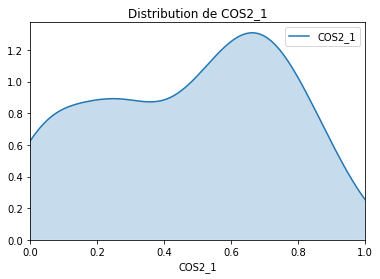

La moyenne de la qualité de représentation est de : 0.47


In [22]:
plt.xlim(0,1)
sns.kdeplot(qual_rep['COS2_1'], shade=True)
plt.title('Distribution de COS2_1')
plt.xlabel('COS2_1')
plt.savefig("Graphiques/qualite_representation_individus.png")
plt.show()

print('La moyenne de la qualité de représentation est de :', 
      round(qual_rep['COS2_1'].mean(), 2))

<p> La moyenne de l'inertie de chaque point sur l'axe F1 est d'environ 47%. <br/> Cela veut dire qu'en moyenne les individus sont bien représentés. </p>

In [23]:
#contributions aux axes
eigval = pca.singular_values_**2/len(data)
ctr = X_projected**2
for j in range(n_comp):
    ctr[:,j] = ctr[:,j]/(len(data)*eigval[j])
    
contrib = pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
contrib.sort_values(by=['CTR_1'], ascending = False).head()

,CTR_1,CTR_2
122,0.023758,0.012372
49,0.019620,0.007487
29,0.018089,0.000038
112,0.017950,0.016259
158,0.015836,0.002423


<p> La somme de toutes les contributions sur un axe est bien égale à 1 </p>

<p> Point intéressant, aucun individu ne prend de trop grande valeur dans l'inertie, on n'a donc pas d'axe fortement influencé par un (ou quelques) individu seulement. </p>

## Construction de l'échantillon avec les données de l'ACP

In [24]:
factorial = pd.DataFrame(X_projected, index=names, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
data2 = data["is_genuine"]
data2 = pd.DataFrame(data2, index=names, columns=['is_genuine'])
data2 = pd.merge(data2, factorial,  left_index = True, right_index = True, how = "left")
data2.head()

,is_genuine,PC1,PC2,PC3,PC4,PC5
0,True,2.153639,1.599709,1.787451,2.433465,0.699690
1,True,-2.110416,-0.526039,0.542563,0.344550,0.067440
2,True,-1.973152,-0.048102,0.858716,0.374812,-0.424886
3,True,-2.059795,-0.089105,-0.531529,0.519548,-0.033267
4,True,-2.403180,0.412170,3.319507,-0.837043,-0.420151


# Mission 2 : Appliquer un algorithme de Classification

In [25]:
from sklearn.cluster import KMeans

## Algorithme k-means

In [26]:
kmeans = KMeans(n_clusters=2, random_state=4).fit(data2.iloc[:,1:])

kmeans = pd.DataFrame(kmeans.labels_, index = data.index, columns=["Clusters"])

In [27]:
data2 = pd.merge(data2, kmeans, left_index=True, right_index=True)
data2.head()

,is_genuine,PC1,PC2,PC3,PC4,PC5,Clusters
0,True,2.153639,1.599709,1.787451,2.433465,0.699690,0
1,True,-2.110416,-0.526039,0.542563,0.344550,0.067440,1
2,True,-1.973152,-0.048102,0.858716,0.374812,-0.424886,1
3,True,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,1
4,True,-2.403180,0.412170,3.319507,-0.837043,-0.420151,1


## Visualisation sur F1

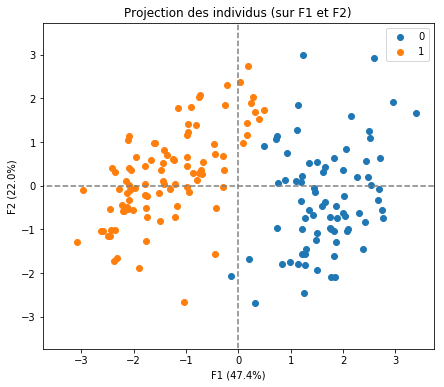

In [28]:
clust = [data2.loc[i, "Clusters"] for i in data.index]
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = clust,
                        name="Graphiques/Projection_kmeans.png")

<p> Nos deux clusters rejoignent presque intégralement les valeurs vrai/faux que nous avions vu avant </p>


## Matrice de confusion et Accuracy

In [29]:
from sklearn.metrics import confusion_matrix

Voici la matrice de confusion :
[[69  1]
 [ 7 93]]


Voici la heatmap :


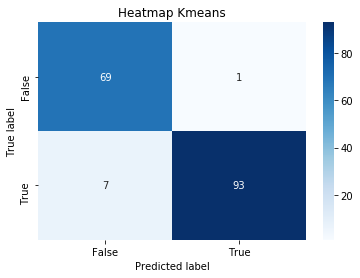

L'accuracy est de :  95.0


In [30]:
#Transformons Cluster 1 en True et Cluster 2 en False :
data_confusion = data2.copy()
data_confusion["y_pred"] = np.where(data_confusion["Clusters"] == 1, True, False)

#Calcul de la matrice de confusion :
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(data_confusion["is_genuine"], 
                               data_confusion['y_pred'])

print("Voici la matrice de confusion :")
print(conf_matrix)

#Heatmap
print("\n")
print("Voici la heatmap :")
ax = sns.heatmap(conf_matrix, cmap=plt.cm.Blues, annot=True)
ax.set(xticklabels=['False', 'True'], yticklabels=['False', 'True'],
        title="Heatmap Kmeans",
        ylabel='True label',
        xlabel='Predicted label')
plt.savefig("Graphiques/heatmap_kmeans")
plt.show()

print("L'accuracy est de : ",
      round((conf_matrix[1,1]+conf_matrix[0,0])/len(data_confusion)*100))

<p> La matrice de confusion indique une accuracy de 95%, ce qui veut dire que le Cluster correspond à hauteur de 95% à la répartition vrai/faux du fichier </p>

#  Mission 3 : Mise en place du Programme

In [31]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Préparation du Df

In [32]:
#On transforme la colonne is_genuine en 1 et 0 ; 1 = True, 0=False.
data2['is_genuine'] = list(map(int, data['is_genuine'])) 
data['is_genuine'] = list(map(int, data['is_genuine']))

## Régression

### Données ACP :

In [33]:
reg_log1 = smf.glm('is_genuine~PC1+PC2',
                   data=data2,
                   family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                            GLM   Df Residuals:                      167
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.4421
Date:                Mon, 27 May 2019   Deviance:                       18.884
Time:                        14:20:59   Pearson chi2:                     31.5
No. Iterations:                     9   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3667      0.976      2.425      0.015       0.454       4.279
PC1           -4.5152      1.249     -3.616      0.0

<p> On obtient une p_valeur inférieur à 5% avec PC1 et PC2 ; La p_valeur de PC3 dépasse notre seuil de 5%, le paramètre n'est donc pas significativement différent de 0. </p>

<p> Nous utiliserons donc PC1 et PC2 pour cette régression logistique. (C'est d'ailleurs ce que laissait entendre l'ACP).</p>

### Données non ACP :

In [34]:
reg_log2 = smf.glm('is_genuine~margin_low+margin_up',
                   data=data,
                   family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                            GLM   Df Residuals:                      167
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.3603
Date:                Mon, 27 May 2019   Deviance:                       12.721
Time:                        14:20:59   Pearson chi2:                     11.3
No. Iterations:                    11   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.4638     74.203      2.378      0.017      31.029     321.898
margin_low   -16.5356      6.923     -2.388      0.0

<p> Ici seules les colonnes Margin_low et Margin_up sont significatives pour la régression. <br/> On conserve donc ces deux colonnes pour nos prédictions </p>

## Définition du Programme

<p> Pour le programme : <br/>
    <li><ol>Import du fichier de base, parcourt des différentes colonnes (en vérifiant que les colonnes correspondent bien à celles de notre fichier train)</ol>
        <ol>Vérifications valeurs manquantes </ol>
        <ol>Centrage et réduction des données (pour le programme ACP)</ol>
        <ol>Transformation des données en valeurs PC1 et PC2 (pour le programme ACP) </ol>
        <ol>Passage dans le .predict de notre régression logistique </ol>
        <ol>Voir comment est le fichier de sortie, surement un traitement des données à faire ensuite </ol></li>

### Programme utilisant les données de l'ACP :

In [35]:
def billets_acp (df):
    #On récupère les noms de colonnes :
    columns_df = list(df.columns)
    columns_data = list(data[['diagonal','height_left', 
                          'height_right','margin_low', 
                          'margin_up','length']].columns)
    
    #On check si une colonne id existe pour l'utiliser en index par la suite : 
    if any("id" in i for i in columns_df):
        id_df = df['id']
    else:
        id_df = df.index    
    
    #On les compare avec celles de notre fichier de train
    result =  all(elem in columns_df  for elem in columns_data)

    if result == True :
        pass
    else:
        print("Les données fournies ne contiennent pas les colonnes requises.")
        print("Pour que le programme fonctionne, il faut les colonnes suivantes :")
        print(columns_data)
        return None
    #On gère les valeurs manquantes :
    df = df.fillna(df.mean()) 
    
    #On prend les colonnes utiles pour le centrage/réduction : 
    df_cr = df[["diagonal", "height_left", 
                 "height_right", "margin_low", 
                 "margin_up", "length"]]
    
    #On centre et on réduit : 
    from sklearn import preprocessing, decomposition
    df_value = df_cr.values
    df_std_scale = preprocessing.StandardScaler().fit(df_value)
    df_scaled = df_std_scale.transform(df_value)
    
    #On applique maintenant le poids de chaque variable 
    #à la variable elle même
    #Pour obtenir ses coordonnées dans F1 et F2 :
    df_scaled = df_scaled.dot(pds)
    #df_scaled = pca.transform(df_scaled)
    #df_scaled = pd.DataFrame(df_scaled, index=id_df, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
    #print(df_scaled)
    df_facto = pd.DataFrame(df_scaled, index=id_df, 
                      columns=[["PC1", "PC2"]])
    
    #On applique la prédiction de la régression logistique : 
    df_predict = reg_log1.predict(df_facto)
    
    #On modifie le df retourné pour avoir l'identifiant, la proba et True or False :
    df_predict = pd.DataFrame(df_predict, index=id_df, columns=["Proba"])
    df_predict["is_genuine"] = np.where(df_predict["Proba"] >= 0.50, True, False)
    
    #On enregistre le fichier dans un répertoire :
    #df_final.to_csv("previsions.csv")
    
    #On calcule le nombre de True et de False : 
    true = df_predict[df_predict["is_genuine"] == True].count()
    false = df_predict[df_predict["is_genuine"] == False].count()
    
    #On print le tout : 
    print("Le nombre de True est de : ", true[1])
    print("Le nombre de False est de : ", false[1])
    
    #On save le fichier avec les True uniquement : 
    vrais_billets = df_predict[df_predict["is_genuine"] == True]
    #vrais_billets.to_csv("vrais_billets.csv")
    
    #On return le tout pour l'avoir en sortie de programme :
    return df_predict

### Programme sans données de l'ACP :

In [36]:
def billets (df):
    #On récupère les noms de colonnes :
    columns_df = list(df.columns)
    columns_data = list(data[['diagonal','height_left', 
                          'height_right','margin_low', 
                          'margin_up','length']].columns)
    
    #On check si une colonne id existe pour l'utiliser en index par la suite : 
    if any("id" in i for i in columns_df):
        id_df = df['id']
        id_df = pd.DataFrame(id_df, index=df.index, columns=['id'])
    else:
        id_df = df.index    
    id_df = pd.DataFrame(id_df, index=df.index, columns=['id'])
    
    #On les compare avec celles de notre fichier de train
    result =  all(elem in columns_df  for elem in columns_data)

    if result == True :
        pass
    else:
        print("Les données fournies ne contiennent pas les colonnes requises.")
        print("Pour que le programme fonctionne, il faut les colonnes suivantes :")
        print(columns_data)
        return None
    
    #On gère les valeurs manquantes :
    df = df.fillna(df.mean())
    
    #On applique la prédiction de la régression logistique :
    df_predict = reg_log2.predict(df)
    
    #On modifie le df retourné pour avoir l'identifiant, la proba et True or False :
    import numpy as np
    df_predict = pd.DataFrame(df_predict, index=df.index, columns=["Proba"])
    df_predict = pd.merge(id_df, df_predict, left_index = True, right_index=True)
    df_predict["is_genuine"] = np.where(df_predict["Proba"] >= 0.50, True, False)
    
    #On enregistre le fichier dans un répertoire :
    #df_predict.to_csv("previsions.csv")
    
    #On calcule le nombre de True et de False : 
    true = df_predict[df_predict["is_genuine"] == True].count()
    false = df_predict[df_predict["is_genuine"] == False].count()
    
    #On print le tout : 
    print("Le nombre de True est de : ", true[1])
    print("Le nombre de False est de : ", false[1])
    
    #On save le fichier avec les True uniquement : 
    vrais_billets = df_predict[df_predict["is_genuine"] == True]
    #vrais_billets.to_csv("vrais_billets.csv")
    
    #On return le tout pour l'avoir en sortie de programme :
    return df_predict

## Matrice de confusion et Accuracy

### Programme ACP :

Le nombre de True est de :  100
Le nombre de False est de :  70
Voici la matrice de confusion :
[[67  3]
 [ 3 97]]


Voici la heatmap :


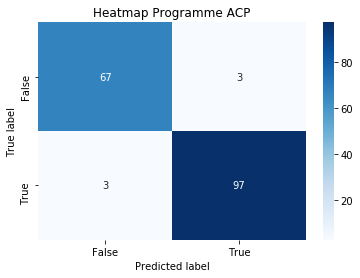

L'accuracy est de :  96.0


In [40]:
#Préparation des données : 
test_data = data.iloc[:,1:]
test_data = billets_acp(test_data)
test_data = test_data['is_genuine']

data_confusion1 = data.copy()
data_confusion1["y_pred"] = test_data

#Calcul de la matrice de confusion :
conf_matrix1 = confusion_matrix(data_confusion1["is_genuine"], 
                               data_confusion1['y_pred'])

print("Voici la matrice de confusion :")
print(conf_matrix1)

#Heatmap
print("\n")
print("Voici la heatmap :")
ax = sns.heatmap(conf_matrix1, cmap=plt.cm.Blues, annot=True)
ax.set(xticklabels=['False', 'True'], yticklabels=['False', 'True'],
        title="Heatmap Programme ACP",
        ylabel='True label',
        xlabel='Predicted label')
plt.savefig("Graphiques/heatmap_programme_acp.png")
plt.show()

print("L'accuracy est de : ",
      round((conf_matrix1[1,1]+conf_matrix1[0,0])/len(data_confusion1)*100))

<p> L'accuracy est à 96%, voyons l'accuracy en utilisant les données du df et non de l'ACP </p>

### Programme non ACP : 

Le nombre de True est de :  101
Le nombre de False est de :  69
Voici la matrice de confusion :
[[68  2]
 [ 1 99]]


Voici la heatmap :


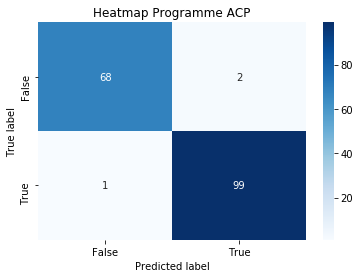

L'accuracy est de :  98.0


In [41]:
#Préparation des données : 
test_data = data.iloc[:,1:]
test_data = billets(test_data)
test_data = test_data['is_genuine']

data_confusion2 = data.copy()
data_confusion2["y_pred"] = test_data

#Calcul de la matrice de confusion :
conf_matrix2 = confusion_matrix(data_confusion2["is_genuine"], 
                               data_confusion2['y_pred'])

print("Voici la matrice de confusion :")
print(conf_matrix2)

#Heatmap
print("\n")
print("Voici la heatmap :")
ax = sns.heatmap(conf_matrix2, cmap=plt.cm.Blues, annot=True)
ax.set(xticklabels=['False', 'True'], yticklabels=['False', 'True'],
        title="Heatmap Programme ACP",
        ylabel='True label',
        xlabel='Predicted label')
plt.savefig("Graphiques/heatmap_programme_sans_acp.png")
plt.show()

print("L'accuracy est de : ",
      round((conf_matrix2[1,1]+conf_matrix2[0,0])/len(data_confusion2)*100))

<p> Ici l'accuracy est de 98%, c'est donc le programme utilisant les données du dataframe et non celles de l'ACP que nous utiliserons. </p>

# Test 

In [42]:
#Test avec le fichier examples : 
test = pd.read_csv("example.csv")
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [43]:
billets(test)

Le nombre de True est de :  2
Le nombre de False est de :  3


,id,Proba,is_genuine
0,A_1,6.776884e-07,False
1,A_2,1.047737e-12,False
2,A_3,1.489232e-06,False
3,A_4,9.991583e-01,True
4,A_5,9.999992e-01,True
